In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from git_root import git_root

In [2]:
# Taken from 
# https://matplotlib.org/stable/gallery/statistics/customized_violin.html#violin-plot-customization
def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')

# Load the data

In [3]:
df = pd.read_csv(Path(git_root()) / "data" / "risotto.csv")
df.head()

,Unnamed: 0,age,nationality,chef_rating,gas_stove,mu,treatment,treatment_effect,outcome
0,0,50.77,Indonesia,7.42,0,3.327548,1,0.572190,3.899738
1,1,59.48,Indonesia,10.39,1,3.061901,1,0.336620,3.398521
2,2,47.25,Iraq,8.28,1,3.781671,1,0.205534,3.987205
3,3,22.21,Iraq,8.02,1,3.471259,0,0.329112,3.471259
4,4,100.40,Iceland,5.86,0,1.701389,1,0.285219,1.986608


# Investigate outcome

Text(0.5, 0, 'pleasure')

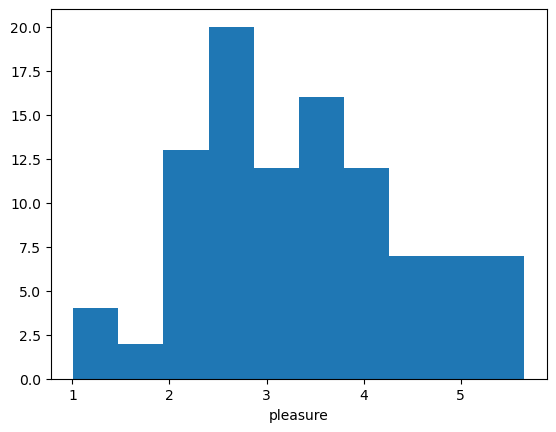

In [4]:
fig, ax = plt.subplots()
ax.hist(df["outcome"])
ax.set_xlabel("pleasure")

Text(0, 0.5, 'pleasure')

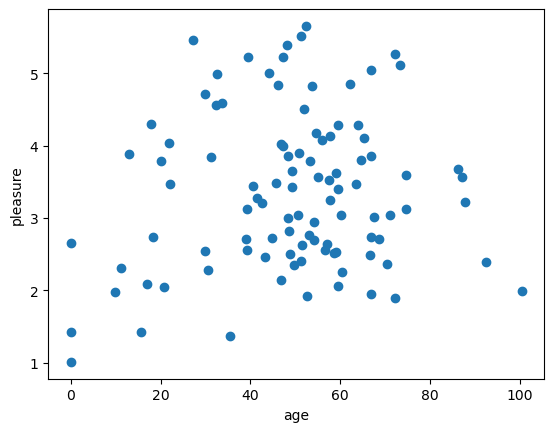

In [5]:
fig, ax = plt.subplots()
ax.scatter(df["age"], df["outcome"])
ax.set_xlabel("age")
ax.set_ylabel("pleasure")

Text(0, 0.5, 'pleasure')

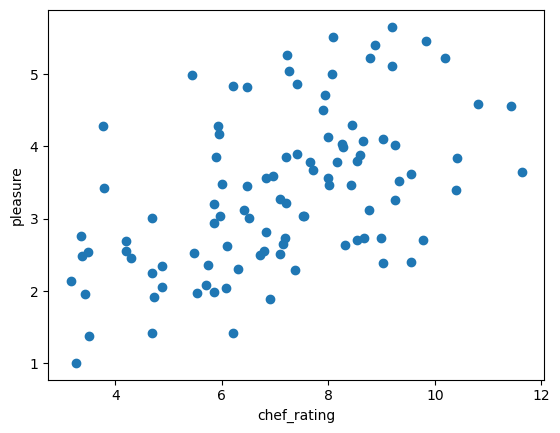

In [6]:
fig, ax = plt.subplots()
ax.scatter(df["chef_rating"], df["outcome"])
ax.set_xlabel("chef_rating")
ax.set_ylabel("pleasure")

Text(0, 0.5, 'pleasure')

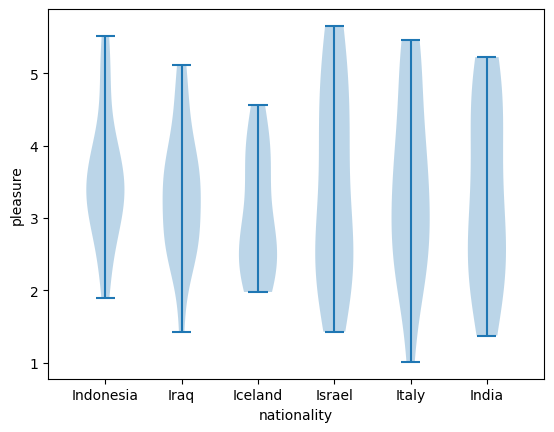

In [7]:
nationalities = df["nationality"].unique()
data = [
    df[df["nationality"] == nationality]["outcome"].values for nationality in nationalities
]

fig, ax = plt.subplots()
ax.violinplot(dataset = data)
set_axis_style(ax, nationalities)
ax.set_xlabel("nationality")
ax.set_ylabel("pleasure")

Text(0, 0.5, 'pleasure')

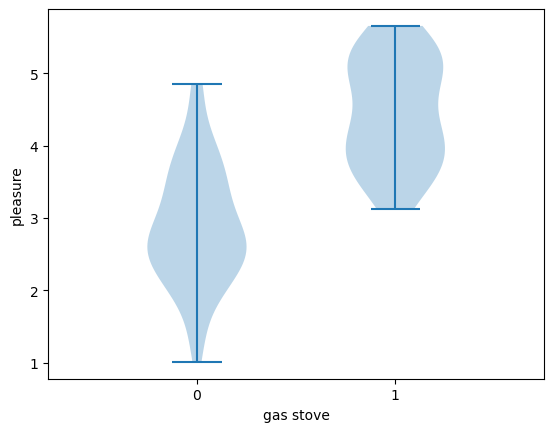

In [8]:
gas_stoves = df["gas_stove"].unique()
data = [
    df[df["gas_stove"] == gas_stove]["outcome"].values for gas_stove in gas_stoves
]

fig, ax = plt.subplots()
ax.violinplot(dataset = data)
set_axis_style(ax, gas_stoves)
ax.set_xlabel("gas stove")
ax.set_ylabel("pleasure")

# Investigate treatment assignment

In [9]:
df["treatment"].value_counts()

1    55
0    45
Name: treatment, dtype: int64

Text(0, 0.5, 'probability of stirring')

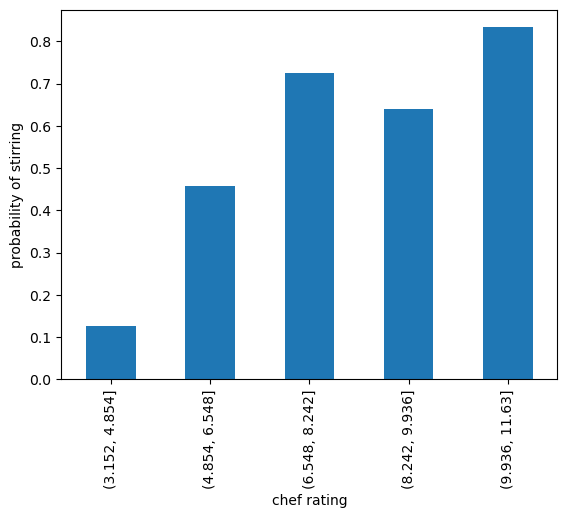

In [10]:
df_bins = df.copy()
df_bins["bin"] = pd.cut(df["chef_rating"], bins=5)
aux = df_bins.groupby("bin")["treatment"].mean()
fig, ax = plt.subplots()
aux.plot.bar(ax=ax)
ax.set_xlabel("chef rating")
ax.set_ylabel("probability of stirring")

# Investigate treatment effect

Text(0.5, 0, 'treatment effect')

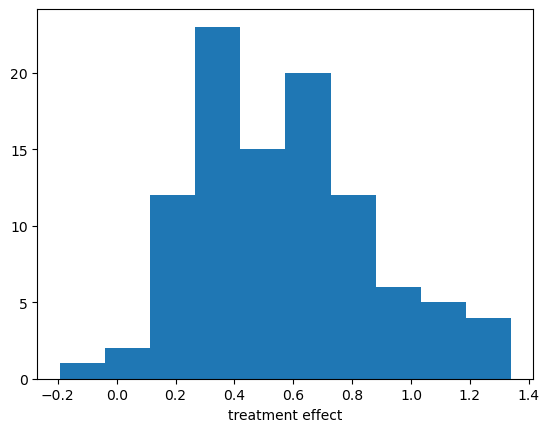

In [11]:
fig, ax = plt.subplots()
ax.hist(df["treatment_effect"])
ax.set_xlabel("treatment effect")